In [55]:
import pandas as pd
import seaborn as sns
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm, tree 
from sklearn.model_selection import GridSearchCV, cross_val_score

In [56]:
import warnings
warnings.filterwarnings( 'ignore' )

In [57]:
df = pd.read_csv('/Users/irenebernardi/Desktop/ML /Glioma-Grading-Classification/TCGA_GBM_LGG_Mutations_all.csv')
df

,Grade,Project,Case_ID,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,LGG,TCGA-LGG,TCGA-DU-8164,Male,51 years 108 days,"Oligodendroglioma, NOS",white,MUTATED,NOT_MUTATED,NOT_MUTATED,...,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
1,LGG,TCGA-LGG,TCGA-QH-A6CY,Male,38 years 261 days,Mixed glioma,white,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
2,LGG,TCGA-LGG,TCGA-HW-A5KM,Male,35 years 62 days,"Astrocytoma, NOS",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
3,LGG,TCGA-LGG,TCGA-E1-A7YE,Female,32 years 283 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED
4,LGG,TCGA-LGG,TCGA-S9-A6WG,Male,31 years 187 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,GBM,TCGA-GBM,TCGA-19-5959,Female,77 years 325 days,Glioblastoma,white,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
858,GBM,TCGA-GBM,TCGA-16-0846,Male,85 years 65 days,Glioblastoma,white,NOT_MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
859,GBM,TCGA-GBM,TCGA-28-1746,Female,77 years 178 days,Glioblastoma,white,NOT_MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
860,GBM,TCGA-GBM,TCGA-32-2491,Male,63 years 121 days,Glioblastoma,white,NOT_MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


# Data preprocessing

In [58]:
for i in df.columns:
    print(df[i].unique())

['LGG' 'GBM']
['TCGA-LGG' 'TCGA-GBM']
['TCGA-DU-8164' 'TCGA-QH-A6CY' 'TCGA-HW-A5KM' 'TCGA-E1-A7YE'
 'TCGA-S9-A6WG' 'TCGA-DB-A4X9' 'TCGA-P5-A5F4' 'TCGA-FG-A4MY'
 'TCGA-HT-A5R5' 'TCGA-DU-A76K' 'TCGA-QH-A6CV' 'TCGA-FG-5962'
 'TCGA-DU-6402' 'TCGA-DB-A75M' 'TCGA-DB-A4XG' 'TCGA-DU-5851'
 'TCGA-DB-A4XH' 'TCGA-HT-7874' 'TCGA-DH-A66D' 'TCGA-DU-5871'
 'TCGA-FG-A60J' 'TCGA-E1-A7Z3' 'TCGA-DU-7011' 'TCGA-VW-A8FI'
 'TCGA-DU-A7TB' 'TCGA-HT-7856' 'TCGA-TQ-A7RU' 'TCGA-HW-7486'
 'TCGA-DU-6399' 'TCGA-DU-A7TA' 'TCGA-HT-A5RA' 'TCGA-DB-5280'
 'TCGA-DU-6405' 'TCGA-S9-A7J1' 'TCGA-S9-A7J2' 'TCGA-HW-7495'
 'TCGA-FG-A710' 'TCGA-P5-A5ET' 'TCGA-DU-7300' 'TCGA-DU-A5TY'
 'TCGA-VM-A8CH' 'TCGA-R8-A6YH' 'TCGA-S9-A6WE' 'TCGA-HT-7681'
 'TCGA-KT-A7W1' 'TCGA-FG-5964' 'TCGA-S9-A6TX' 'TCGA-P5-A5F2'
 'TCGA-DU-5874' 'TCGA-DU-A5TT' 'TCGA-CS-5396' 'TCGA-DU-7302'
 'TCGA-S9-A6TW' 'TCGA-RY-A845' 'TCGA-HT-A61A' 'TCGA-DU-7018'
 'TCGA-HW-7489' 'TCGA-R8-A6ML' 'TCGA-DH-5144' 'TCGA-DU-7013'
 'TCGA-CS-4941' 'TCGA-WY-A85E' 'TCGA-DH-A7UR' '

In [59]:
df.replace({'MUTATED': 1, 'NOT_MUTATED': 0, 'Female': 1, 'Male': 0, 'LGG': 0, 'GBM': 1}, inplace=True)

In [60]:
df = df[df['Gender'] != '--']
df.drop(columns=(['Case_ID', 'Project', 'Primary_Diagnosis']), inplace=True)

In [61]:
df = df[df['Race'] != 'not reported']
df

,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,0,0,51 years 108 days,white,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,38 years 261 days,white,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,35 years 62 days,white,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,32 years 283 days,white,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,31 years 187 days,white,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,1,1,77 years 325 days,white,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
858,1,0,85 years 65 days,white,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
859,1,1,77 years 178 days,white,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
860,1,0,63 years 121 days,white,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [62]:
df = pd.concat([df, pd.get_dummies(df['Race'], prefix='Race')], axis=1)

In [63]:
df.drop(columns=['Race'], inplace=True)
df

,Grade,Gender,Age_at_diagnosis,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,...,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA,Race_american indian or alaska native,Race_asian,Race_black or african american,Race_white
0,0,0,51 years 108 days,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,38 years 261 days,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,35 years 62 days,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,32 years 283 days,1,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,0,0,31 years 187 days,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,1,1,77 years 325 days,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
858,1,0,85 years 65 days,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
859,1,1,77 years 178 days,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
860,1,0,63 years 121 days,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [64]:
data = []
years = pd.DataFrame(data)

In [65]:
years = df['Age_at_diagnosis'].str.split(' ', expand=True)
years.drop(columns=[1, 3], inplace=True)
years[2] = pd.to_numeric(years[2], errors='coerce')
years[0] = pd.to_numeric(years[0], errors='coerce')
years[2] = round(years[2] / 365, 2)
years[0] = years[0] + years[2]
df['Age_at_diagnosis'] = years[0]
df

,Grade,Gender,Age_at_diagnosis,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,...,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA,Race_american indian or alaska native,Race_asian,Race_black or african american,Race_white
0,0,0,51.30,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,38.72,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,35.17,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,32.78,1,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,0,0,31.51,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857,1,1,77.89,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
858,1,0,85.18,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
859,1,1,77.49,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
860,1,0,63.33,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [66]:
df.describe()

,Grade,Age_at_diagnosis,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,PIK3CA,...,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA,Race_american indian or alaska native,Race_asian,Race_black or african american,Race_white
count,840.000000,837.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,...,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000
mean,0.419048,50.873130,0.482143,0.414286,0.258333,0.167857,0.133333,0.132143,0.116667,0.086905,...,0.032143,0.032143,0.032143,0.027381,0.027381,0.026190,0.001190,0.016667,0.070238,0.911905
std,0.493697,15.661575,0.499979,0.492892,0.437979,0.373962,0.340137,0.338848,0.321214,0.281863,...,0.176484,0.176484,0.176484,0.163288,0.163288,0.159797,0.034503,0.128095,0.255700,0.283602
min,0.000000,14.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,38.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,51.470000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,62.640000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,89.290000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='Age_at_diagnosis'>

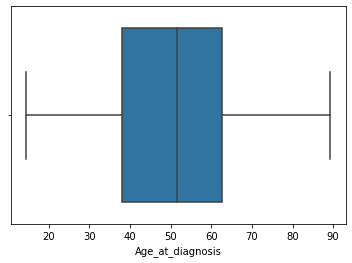

In [67]:
sns.boxplot(data=df, x='Age_at_diagnosis')

In [68]:
df['Age_at_diagnosis'].fillna(df['Age_at_diagnosis'].mean(), inplace=True)
df.describe()
# imputing missing age values w mean and not median bc boxplot shows no outliers TODO make another boxplot 

,Grade,Age_at_diagnosis,IDH1,TP53,ATRX,PTEN,EGFR,CIC,MUC16,PIK3CA,...,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA,Race_american indian or alaska native,Race_asian,Race_black or african american,Race_white
count,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,...,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000
mean,0.419048,50.873130,0.482143,0.414286,0.258333,0.167857,0.133333,0.132143,0.116667,0.086905,...,0.032143,0.032143,0.032143,0.027381,0.027381,0.026190,0.001190,0.016667,0.070238,0.911905
std,0.493697,15.633549,0.499979,0.492892,0.437979,0.373962,0.340137,0.338848,0.321214,0.281863,...,0.176484,0.176484,0.176484,0.163288,0.163288,0.159797,0.034503,0.128095,0.255700,0.283602
min,0.000000,14.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,38.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,51.390000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,62.617500,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,89.290000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Visualization

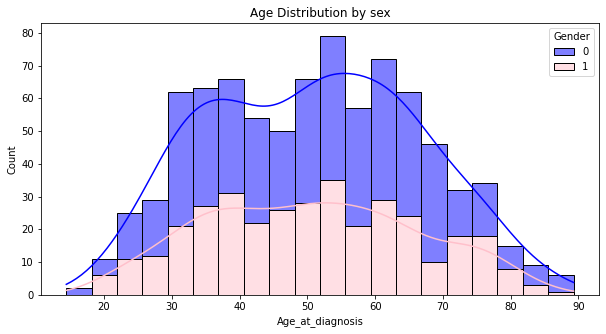

In [69]:
#checking age distribution 
plt.figure(figsize=(10, 5))
sns.histplot(x='Age_at_diagnosis', data=df, hue='Gender', palette={0: 'blue', 1: 'pink'}, multiple='stack', bins=20, kde=True)
plt.title('Age Distribution by sex')
plt.show()

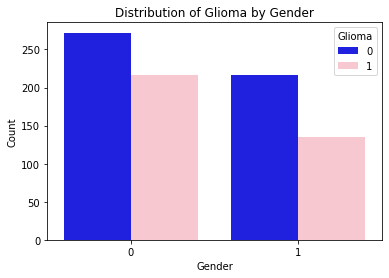

In [70]:
sns.countplot(data=df, x='Gender', hue='Grade', palette={0: 'blue', 1: 'pink'})

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Glioma by Gender')
plt.legend(title='Glioma')

plt.show()

In [71]:
df.iloc[:, 3 : 23].columns

Index(['IDH1', 'TP53', 'ATRX', 'PTEN', 'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1',
       'PIK3R1', 'FUBP1', 'RB1', 'NOTCH1', 'BCOR', 'CSMD3', 'SMARCA4',
       'GRIN2A', 'IDH2', 'FAT4', 'PDGFRA'],
      dtype='object')

comment: Results: We identified mutations that affected amino acid 132 of IDH1 in more than 70% of WHO grade II and III astrocytomas and oligodendrogliomas and in glioblastomas that developed from these lower-grade lesions. Tumors without mutations in IDH1 often had mutations affecting the analogous amino acid (R172) of the IDH2 gene. Tumors with IDH1 or IDH2 mutations had distinctive genetic and clinical characteristics, and patients with such tumors had a better outcome than those with wild-type IDH genes. Each of four tested IDH1 and IDH2 mutations reduced the enzymatic activity of the encoded protein.

In [72]:
fig = make_subplots(rows=5, cols=4)

# Loop through columns 3 to 22 (indexing from 0 to 19)
column_names = []  # List to store column names for legend

for i, column in enumerate(df.iloc[:, 3:23].columns, start=1):
    row_num = (i - 1) // 4 + 1  # Calculate row number
    col_num = (i - 1) % 4 + 1   # Calculate column number

    value_counts = df[column].value_counts()

    fig.add_trace(
        go.Bar(x=value_counts.index, y=value_counts.values),
        row=row_num, col=col_num
    )
    
    column_names.append(f'Column {column}')  # Store column names for legend

    fig.update_xaxes(title_text=f'{column}', row=row_num, col=col_num)  # X-axis title

# Update layout for all subplots
fig.update_layout(title='Value Counts for Columns 3 to 22', width = 1000, height = 1200)
fig.for_each_trace(lambda trace: trace.update(name=column_names.pop(0)))  # Update trace names using stored column names
fig.show()

Explains why IDH1 mutations so prevalent (boxplot balanced). Also expect that correlation matrix will show inv corrs between idh1 and idh2

Other mutations imbalanced bc not all gliomas have all mutated genes

<AxesSubplot:>

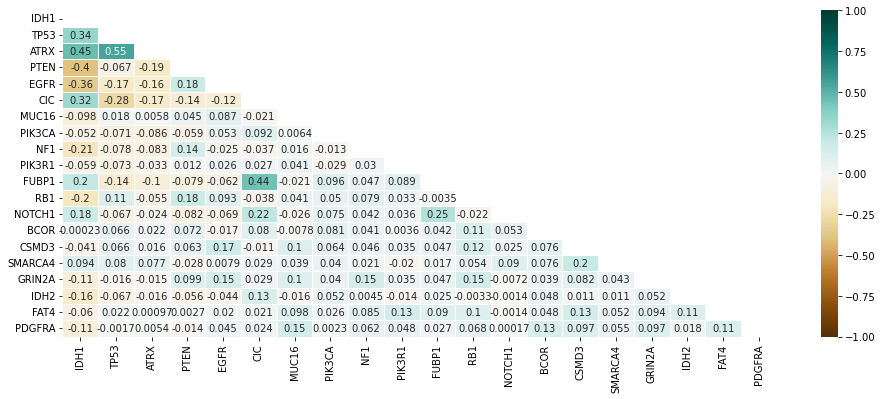

In [73]:
plt.figure(figsize=(16, 6))
corr = df.iloc[:, 3 : 23].corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

# using the upper triangle matrix as mask 
sns.heatmap(corr, annot=True, mask=matrix, vmin=-1, vmax=1, linewidths=.5, cmap='BrBG')

We will explain that we had initially hypothesized to use PCA because of the high dimensionality of the dataset. 
However, upon inspecting feature correlations (which we DID NOT DO WELL) and determining that we cannot establish a complete lack of linear correlation (bc of MENTION CORRELATIONS AND PAPER BACKED UP EVIDENCE) between features, we decided not to perform feature scaling. 

Yes, PCA can be applied even if there are many binary columns in your dataset. PCA operates on the correlation structure of the data, and it can be applied regardless of the type of data (binary, categorical, numerical, etc.). However, whether it's effective or advisable to use PCA with binary data depends on the specific characteristics of your dataset and your objectives.

When applying PCA to binary data, it's essential to consider a few points:

### Sparsity and Interpretation:
- **Sparsity:** Binary data often leads to sparse matrices, which might affect the effectiveness of PCA.
- **Interpretation:** Interpretability might be reduced as the principal components become linear combinations of binary variables.

### Variance Explained:
- **Explained Variance:** With binary data, the variance might not be well captured by principal components compared to continuous variables.

### Dimensionality Reduction:
- **Reducing Dimensionality:** Despite the above challenges, PCA might still help in reducing dimensionality and might be beneficial if the binary variables are highly correlated.

### Alternative Methods:
- **Alternative Techniques:** For binary data, alternative dimensionality reduction techniques like factor analysis or non-linear methods might be more suitable.

### Sparse PCA:
- **Sparse PCA:** There's also Sparse PCA, which is designed to handle sparse data more effectively by encouraging sparsity in the loadings.

Before applying PCA to binary data, consider the trade-offs and whether it aligns with your objectives, especially in terms of interpretability, explained variance, and the underlying structure of your data. Additionally, try different techniques and assess their effectiveness based on your specific use case and dataset characteristics.

Model Selection: what will be an appropriate algorithm? You can choose (or try) more than one and compare. Clearly state your reasons for choosing a particular algorithm. 

just say class and find out which is best
 - random forest 
  - logistic regression 
  - SVM



In [74]:
#define label and features
X = df.drop(columns=['Grade'])
y = df['Grade']

In [75]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [76]:
#all of our potential models: 
models = []
model1 = LogisticRegression()
models.append(model1)
model2 = svm.SVC()
models.append(model2)
model3 = tree.DecisionTreeClassifier()
models.append(model3)
model4 = RandomForestClassifier()
models.append(model4)
models

[LogisticRegression(),
 SVC(),
 DecisionTreeClassifier(),
 RandomForestClassifier()]

In [77]:
#model evaluation with accuracy, cm, f1, roc scores
for model in models:
    print(model)
    model.fit(X_train, y_train)
    y_pred= model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy of %s is %s"%(model, accuracy))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix of %s is %s"%(model, cm))
    recall = recall_score(y_test, y_pred)
    print("Recall score of %s is %s"%(model, recall))
    #TODO: JUSTIFY F1 W IMBALANCED FEAtures in dataset 
    f1 = f1_score(y_test, y_pred)
    print("F1 score of %s is %s"%(model, f1))
    roc_auc = roc_auc_score(y_test, y_pred)
    print("ROC AUC score of %s is %s"%(model, roc_auc))
    print("-------------------------------------------------------")

LogisticRegression()
Accuracy of LogisticRegression() is 0.8690476190476191
Confusion Matrix of LogisticRegression() is [[130  18]
 [ 15  89]]
Recall score of LogisticRegression() is 0.8557692307692307
F1 score of LogisticRegression() is 0.8436018957345972
ROC AUC score of LogisticRegression() is 0.8670738045738047
-------------------------------------------------------
SVC()
Accuracy of SVC() is 0.7222222222222222
Confusion Matrix of SVC() is [[118  30]
 [ 40  64]]
Recall score of SVC() is 0.6153846153846154
F1 score of SVC() is 0.6464646464646464
ROC AUC score of SVC() is 0.7063409563409563
-------------------------------------------------------
DecisionTreeClassifier()
Accuracy of DecisionTreeClassifier() is 0.8055555555555556
Confusion Matrix of DecisionTreeClassifier() is [[126  22]
 [ 27  77]]
Recall score of DecisionTreeClassifier() is 0.7403846153846154
F1 score of DecisionTreeClassifier() is 0.7586206896551725
ROC AUC score of DecisionTreeClassifier() is 0.7958679833679834
---

In [78]:
#keeping only best models: LR and randomforest
models.remove(model2)
models.remove(model3)
models

[LogisticRegression(), RandomForestClassifier()]

In [79]:
#cross validation
splits = [5, 10] #trying 5 and 10 folds
for i in splits:
    kf = KFold(n_splits=i, shuffle=True, random_state=42)
    for model in models:
        accuracy = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
        f1 = cross_val_score(model, X_train, y_train, cv=kf, scoring='f1')
        roc_auc = cross_val_score(model, X_train, y_train,cv=kf, scoring='roc_auc')
        recall = cross_val_score(model, X_train, y_train, cv = kf, scoring = 'recall')
        print(f'''
                Accuracy of {model} for {i} splits is {round(accuracy.mean(), 5)} 
                F1 score of {model} for {i} splits is {round(f1.mean(), 5)} 
                ROC AUC score of {model} for {i} splits is {round(roc_auc.mean(), 5)}
                Recall score of {model} for {i} splits is {round(recall.mean(), 5)}
            ''')
    print("                ---------------------------------------------------------------")

#TODO: ASK OSSNAT possibly f1 score is better bc of imbalanced features in dataset

#TODO: make dict for each evaluation metrics and then compare  


                Accuracy of LogisticRegression() for 5 splits is 0.86567 
                F1 score of LogisticRegression() for 5 splits is 0.85059 
                ROC AUC score of LogisticRegression() for 5 splits is 0.91633
                Recall score of LogisticRegression() for 5 splits is 0.91008
            

                Accuracy of RandomForestClassifier() for 5 splits is 0.83175 
                F1 score of RandomForestClassifier() for 5 splits is 0.80352 
                ROC AUC score of RandomForestClassifier() for 5 splits is 0.8911
                Recall score of RandomForestClassifier() for 5 splits is 0.79773
            
                ---------------------------------------------------------------

                Accuracy of LogisticRegression() for 10 splits is 0.86739 
                F1 score of LogisticRegression() for 10 splits is 0.85304 
                ROC AUC score of LogisticRegression() for 10 splits is 0.91855
                Recall score of LogisticR

In [80]:
#5 folds is best , TODO: decide if AUC-ROC/ recall/ accuracy /f1 scores based on our dataset

In [81]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [88]:
#grid search for logistic regression

param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    #'C' : [0.001,0.01,0.1,1,10,100,1000], #this is not granular enough TODO: MENTION IN REPORT 
    'C': np.logspace(-4, 4, 20), #more granular params bc evenly dsitributed in logspace
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga']
    }
]


grid_search = GridSearchCV(estimator = model1,
                           param_grid = param_grid,
                           scoring = 'accuracy', #change. maybe.
                           cv = kf).fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")




Best parameters: {'C': 0.615848211066026, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score: 0.8690569317687962


In [96]:
y_pred_g = grid_search.predict(X_test)

#after osnat responds pick one from model eval metrics above 
accuracy_g = accuracy_score(y_test, y_pred_g)
print(f"Accuracy of new LogisticRegression is {accuracy_g}")

Accuracy of new LogisticRegression is 0.8809523809523809


In [98]:
grid_search.best_estimator_

LogisticRegression(C=0.615848211066026, penalty='l1', solver='liblinear')

In [99]:
y_pred = model1.predict(X_test)
prev_accuracy = accuracy_score(y_test, y_pred)
print(f"previous Accuracy of LogisticRegression is {prev_accuracy}")

if accuracy_g > prev_accuracy:
    print("Accuracy improved after gridsearch")
else: 
    print("Accuracy did not improve after gridsearch")

previous Accuracy of LogisticRegression is 0.8690476190476191
Accuracy improved after gridsearch


1. kfold cross validation (5,10)


2. use diff grid search hyperparameters to determine which best between randomforestclassifier and logistic regression 

3. kfold cross validation 

In [87]:
#random forest was second best model, so grid search for random forest to see if tuning hyperparams improves accuracy/whatever metric we end up picking

#FPR RANDOM FOREST find values

param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : [0.001,0.01,0.1,1,10,100,1000],
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga']
    }
]

grid_search = GridSearchCV(estimator=model1,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5).fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")


Best parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation score: 0.8690569317687962


In [ ]:
#pick which best bewten rf and lr after hyperparametter turning

In [ ]:
#when found best params plt smth like this 


#Scatter plot for the actual training values
scatter = go.Scatter(x=x_train.values.flatten(), y=y_train.values.flatten(), mode='markers', name='Actual')
#line plot for the predicted training values
line = go.Scatter(x=x_train.values.flatten(), y=y_pred.values.flatten(), mode='lines', name='Predicted')
layout = go.Layout(title='Actual vs Predicted, train set', xaxis=dict(title='population'), yaxis=dict(title='profit'))
data = [scatter, line]
figtr = go.Figure(data=data, layout=layout)
figtr.show()


#predict new values based on the test set


#scatter for  y test values
scatter = go.Scatter(x=x_test.values.flatten(), y=y_test.values.flatten(), mode='markers', name='Actual')
#line for predicted y values 
line = go.Scatter(x=x_test.values.flatten(), y=new_y.values.flatten(), mode='lines', name='Predicted')
layout = go.Layout(title='Actual vs Predicted, test set', xaxis=dict(title='population'), yaxis=dict(title='profit'))
data = [scatter, line]
figte = go.Figure(data=data, layout=layout)
figte.show()
